In [1]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np
import scipy.fft
from sklearn.cluster import KMeans
import os

def read_mp3(name):
    sound = AudioSegment.from_mp3(name)

    samples = np.array(sound.get_array_of_samples())

    signal = np.array((samples[0::2] + samples[1::2])/2)
    return signal

sounds = []

for filename in sorted(os.listdir('./mp3/')) :
    if filename.endswith(".mp3"):
        sounds.append(read_mp3(os.path.join('./mp3/', filename)))

sounds = np.array(sounds, dtype=object)

framerate = 44100
N = 256

In [2]:
def split(signal):
    split_signal = np.array_split(np.array(signal, dtype=np.float64), N)
    return split_signal

In [3]:
def window(split_signal):
    split_signal = np.array([interval * np.hamming(len(interval)) for interval in split_signal], dtype=object)
    return split_signal

In [4]:
def dft(split_signal):
    dftValues = np.array([scipy.fft.fft(interval, n=N) for interval in split_signal], dtype=object)
    return dftValues

In [5]:
def ampSpectrum(dftValues):
    amplitudeSpectrum = np.array([np.absolute(interval[:len(interval)//2]) for interval in dftValues], dtype=object)
    return amplitudeSpectrum

In [6]:
def averageSpec(amplitudeSpectrum):
    averageSpectrum = []
    for interval in amplitudeSpectrum:
        averageSpectrum.append(np.average(interval))
    return averageSpectrum

In [7]:
def kmean(averageSpectrum):
    k = 5
    kmeans = KMeans(n_clusters=k, random_state=0).fit(averageSpectrum)
    return kmeans

In [8]:
klaster = []
for signal in sounds:
    split_signal = split(signal)
    split_signal = window(split_signal)
    dftValues = dft(split_signal)
    amplitudeSpectrum = ampSpectrum(dftValues)
    averageSpectrum = averageSpec(amplitudeSpectrum)
    klaster.append(averageSpectrum)


In [12]:
from sklearn.decomposition import PCA

klaster = np.array(klaster)

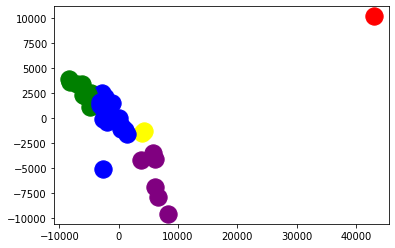

In [13]:
k = 5
colors = ['Green', 'Red', 'Blue', 'Yellow', 'Purple']
kmeans = KMeans(n_clusters=k, random_state=0).fit(klaster)

reduced_data = PCA(n_components=2).fit_transform(klaster)
for item, label in zip(reduced_data, kmeans.labels_):
    plt.scatter(item[0], item[1], s=300, color=colors[label])